In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/countries-of-the-world/countries of the world.csv


In [2]:
dataCountries=pd.read_csv('../input/countries-of-the-world/countries of the world.csv')

In [3]:
dataCountries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [4]:
dataCountries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

# Introduce


**The following data were visualized with this study:**

1-) Population by Regions

2-) Population Density by Regions

3-) Distribution of World Population by Regions

4-) Population by Country

5-) Top 10 Countries with the Most Population

6-) Population Density by Country

7-) Infant Mortality Rates by Country

8-) Top 10 Countries with Highest Infant Mortality Rates

9-) Birth and Death Rates of Countries

10-) Top 10 Countries with the Highest Literacy Rate

11-) Sectoral Distribution by Country

12-) Countries' GDP Values (USA dollar per capita) and Leading Sectors

13-) Top 10 Most Arable(%) Countries

# Population by Regions

In [5]:
regions=dataCountries.Region.unique()
dataCountries['Pop. Density (per sq. mi.)']=([float(each.replace(',','.')) for each in dataCountries['Pop. Density (per sq. mi.)']])
population=[]
pop_density=[]
for i in regions:
    x=dataCountries[dataCountries.Region==i]
    population.append(sum(x.Population))
    pop_density.append(sum(x['Pop. Density (per sq. mi.)']))
pop_reg=pd.DataFrame({"Regions":regions,
                    "Population":population,
                    "PopulationDensity":pop_density})
pop_reg.sort_values(by=['Population'],inplace=True,ascending=False)


In [6]:
population_bar=go.Bar(x=pop_reg.Regions,
                      y=pop_reg.Population,
                     name="Population",
                     marker = dict(color = 'rgba(50, 134, 55, 0.5)',
                     line=dict(color='rgb(0,0,0)',width=1.5)),
                     text=pop_reg.Regions,
                     )
layout=go.Layout(title='Population by Regions',)
fig=go.Figure(data=population_bar,layout=layout)
iplot(fig)

# Population Density by Regions

In [7]:
pop_den=pop_reg.sort_values(by=['PopulationDensity'],ascending=False)
pop_density_bar=go.Bar(x=pop_den.Regions,
                      y=pop_den.PopulationDensity,
                     name="Population Density",
                     marker = dict(color = 'rgba(50, 134, 55, 0.5)',
                     line=dict(color='rgb(0,0,0)',width=1.5)),
                     text=pop_den.Regions,
                     )
layout=go.Layout(title='Population Density by Regions (per sq. mi.)',)
fig=go.Figure(data=pop_density_bar,layout=layout)
iplot(fig)

# Distribution of World Population by Regions

In [8]:
population_pie={
  "data": [
    {
      "values": pop_reg.Population,
      "labels": pop_reg.Regions,
      "domain": {"x": [0, .8],
                "y": [0, .8]},
      "name": "Population Rate of Regions",
      "hoverinfo":"label+percent+name",
      "hole": .2,
      "type": "pie"
    },],
  "layout": {
        "title":"Population Rate of Regions",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Population Rate of Regions",
                "x": 0.27,
                "y": 1
            },
        ]
    }
}
    
iplot(population_pie)



# Population by Country

In [9]:
pop= go.Scatter(
                    x = dataCountries.Country,
                    y = dataCountries.Population,
                    mode = "lines+markers",
                    name = "Population",
                    marker = dict(color = 'rgba(80, 26, 255, 0.8)'),
                    text= dataCountries.Country)
data = [pop]
layout = dict(title = 'Population by Country',
              xaxis= dict(title= 'Country',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

# Top 10 Countries with the Most Population

In [10]:
data_pop=dataCountries.loc[:,['Country','Population']]
data_pop.sort_values(by=['Population'],inplace=True,ascending=False)
pop_bar=px.bar(data_pop[:10],x='Country',y='Population',title="Top 10 Countries with the Most Population")
pop_bar.show()

# Population Density by Country

In [11]:
pop_den_con= go.Scatter(
                    x = dataCountries.Country,
                    y = dataCountries['Pop. Density (per sq. mi.)'],
                    mode = "lines+markers",
                    name = "Population Density",
                    marker = dict(color = 'rgba(80, 26, 255, 0.8)'),
                    text= dataCountries.Country)
data = [pop_den_con]
layout = dict(title = 'Population Density (per sq. mi.)  by Country',
              xaxis= dict(title= 'Country',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

# Infant Mortality Rates by Country

In [12]:
data_infant_morality=dataCountries.loc[:,['Country','Infant mortality (per 1000 births)']]
data_infant_morality.dropna(inplace=True)
data_infant_morality['Infant mortality (per 1000 births)']=[float(each.replace(',','.')) for each in data_infant_morality['Infant mortality (per 1000 births)']]

In [13]:
infantMortality= go.Scatter(
                    x = data_infant_morality.Country,
                    y = data_infant_morality['Infant mortality (per 1000 births)'],
                    mode = "lines+markers",
                    name = "Infant Mortality Rates",
                    marker = dict(color = 'rgba(80, 26, 255, 0.8)'),
                    text= data_infant_morality.Country)
data = [infantMortality]
layout = dict(title = 'Infant Mortality Rates by Country (per 1000 births)',
              xaxis= dict(title= 'Country',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

# Top 10 Countries with Highest Infant Mortality Rates

In [14]:
data_infant_morality.sort_values(by=['Infant mortality (per 1000 births)'],inplace=True,ascending=False)
inf_mor_bar=px.bar(data_infant_morality[:10],x='Country',y='Infant mortality (per 1000 births)',title="Top 10 Countries with Highest Infant Mortality Rates")
inf_mor_bar.show()

# Birth and Death Rates of Countries

In [15]:
birthrate = go.Scatter(
    x = dataCountries.index,
    y = dataCountries.Birthrate,
    mode = 'lines+markers',
    name = 'Birthrate',
    marker = dict(color = 'rgba(10, 255, 10, 0.5)'),
    text = dataCountries.Country)

deathrate = go.Scatter(
    x = dataCountries.index,
    y = dataCountries.Deathrate,
    mode = 'lines+markers',
    name = 'Deathrate',
    marker = dict(color = 'rgba(255, 10, 10, 0.5)'),
    text = dataCountries.Country)

layout = dict(title = 'Birth and Death Rate of Countries',
             xaxis= dict(zeroline= False)
             )

data = [birthrate, deathrate]
fig = dict(data = data, layout = layout)

iplot(fig)

# Top 10 Countries with the Highest Literacy Rate

In [16]:

literacy=dataCountries.loc[:,['Country','Literacy (%)']]
literacy.dropna(inplace=True)
literacy['Literacy (%)']=([float(each.replace(',','.')) for each in literacy['Literacy (%)']])
literacy.columns=['Country','Literacy']
highest_literacy=literacy.sort_values(by='Literacy',ascending=False)[:10]

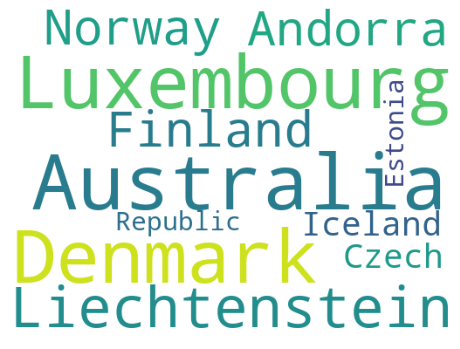

In [17]:
literacy_of_countries = highest_literacy.Country
plt.subplots(figsize=(8,8))
literacy_wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(literacy_of_countries))
plt.imshow(literacy_wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

# Sectoral Distribution by Country

In [18]:

dataSector=dataCountries.loc[:,['Country','Agriculture','Industry','Service','GDP ($ per capita)']]
dataSector.dropna(inplace=True)
dataSector.Agriculture=[float(each.replace(',','.')) for each in dataSector.Agriculture]
dataSector.Industry=[float(each.replace(',','.')) for each in dataSector.Industry]
dataSector.Service=[float(each.replace(',','.')) for each in dataSector.Service]

sector_scatter = px.scatter_3d(dataSector, x='Agriculture', y='Industry', z='Service',
                    color='Country',
                    title='Sectoral Distribution',  
                   )
sector_scatter.show()

# Countries' GDP Values  (USA dollar per capita) and Leading Sectors


(**Gross domestic product (GDP)** is a monetary measure of the market value of all the final goods and services produced in a specific time period)

In [19]:
#editting data
agr=list(dataSector.Agriculture)
ind=list(dataSector.Industry)
serv=list(dataSector.Service)
gdp=list(dataSector['GDP ($ per capita)'])
leading_sector=[]
for i in range(211):
    x=max(agr[i],ind[i],serv[i])
    if x== agr[i]:
        leading_sector.append('Agriculture')
    elif x==ind[i]:
        leading_sector.append('Industry')
    elif x==serv[i]:
        leading_sector.append('Service')
dataSector2=pd.DataFrame({"Country":dataSector.Country,
                         "Agriculture":agr,
                         "Industry":ind,
                         "Service":serv,
                         "LeadingSector":leading_sector,
                         "GDP":gdp})
fig = px.scatter(dataSector2, x="Country", y="GDP",color="LeadingSector")
fig.show()


# Top 10 Most Arable(%) Countries

In [20]:
df_arable=dataCountries.loc[:,['Country','Arable (%)']]
df_arable.dropna(inplace=True)
df_arable['Arable (%)']=([float(each.replace(',','.')) for each in df_arable['Arable (%)']])
df_arable=df_arable.sort_values(by='Arable (%)',ascending=False)

arable_bar=px.bar(df_arable[:10],x='Country',y='Arable (%)')
arable_bar.show()
